# Student Details


*   Name:Muhammad Aslah M
*   Roll Number:231110
*   Emial ID:muhammada.cs23@duk.ac.in



# Question

1.   Perform exploratory data analysis **[7 Marks]**
2.   Make an appropriate logistic regression model for the given data **[8 Marks]**
3. Draw the decision boundary along with data **[4 Marks]**
4. Estimate the model performance **[6 marks]**

DataSet: binary_classification_dataset.csv

##1: Exploratory data analysis


In [35]:
# Your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/aslahmp/Documents/college/class/pa/binary_classification_dataset.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

# Display the summary statistics of the DataFrame
print(df.describe())

# Display the data types of each column
print(df.dtypes)
indices_to_remove = df[df['Target'].isna()].index

# Remove these rows
df = df.drop(indices_to_remove)
# Check for missing values
print(df.isnull().sum())




   Feature1  Feature2 Target
0    1.7250       520    Yes
1    1.8875       428     No
2    1.6000       552    Yes
3    1.4250       500     No
4    1.7750       628     No
           Feature1     Feature2
count   1020.000000  1020.000000
mean      11.436679   520.988235
std      313.061049    69.793442
min        1.250000   400.000000
25%        1.450000   464.000000
50%        1.637500   520.000000
75%        1.828125   584.000000
max    10000.000000   640.000000
Feature1    float64
Feature2      int64
Target       object
dtype: object
Feature1    0
Feature2    0
Target      0
dtype: int64


<Axes: xlabel='Feature1', ylabel='Feature2'>

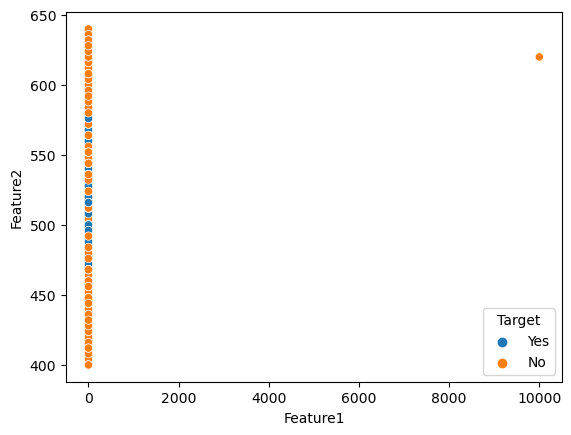

In [36]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

In [37]:
df = df[df['Feature1'] != 10000.000000]

# Check the remaining rows
print(df.shape)

(999, 3)


In [38]:
print(df.describe())

         Feature1    Feature2
count  999.000000  999.000000
mean     1.634547  521.109109
std      0.220714   70.005347
min      1.250000  400.000000
25%      1.450000  464.000000
50%      1.637500  520.000000
75%      1.831250  584.000000
max      2.000000  640.000000


<Axes: xlabel='Feature1', ylabel='Feature2'>

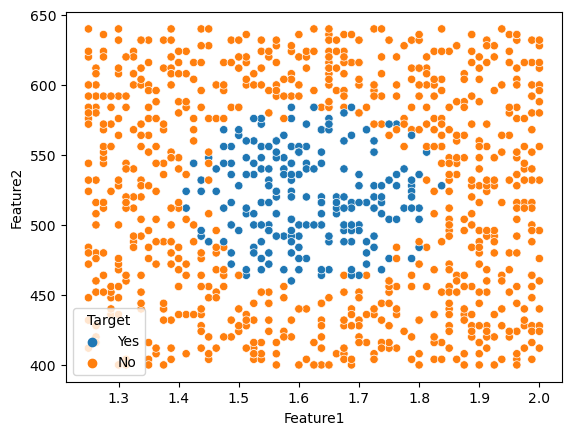

In [39]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

* **Which methods did you use in this step?**

> 1. Display the first 5 rows of the DataFrame
> 2. Display the summary statistics of the DataFrame
> 3. Check for missing values
> 4. Removed missing values
> 5. plot 
> 6. Feature1 have one out layer removed that

##2: Logistic regression model

* **Write down the model you are going to use in this step.**

$$ Your Answer$$

In [40]:
# implement the logistic regression

##3: Draw the decision boundary

Note: You are free to use any package or you can code it

In [41]:
# your code

##4: Model performance





In [42]:
# your code

* **Write two sentences about the model's performance based on the metric you used to evaluate it.**

> * Your Answer